# Tidy Data

- tabular data
- one value per cell
- 1 var / column
- 1 obs / row

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## One Variable in Multiple Columns

- `melt`

In [2]:
df1 = pd.read_csv('./untidy_data/treatments.csv')
df1.columns = ['subject_name', 'treatment_a', 'treatment_b', 'treatment_c']
df1

,subject_name,treatment_a,treatment_b,treatment_c
0,John Smith,NaN,2,0
1,Jane Doe,16.0,11,3
2,Mary Johnson,3.0,1,4


In [3]:
df1m = df1.melt(id_vars='subject_name', var_name='treatment', value_name='response')
df1m

,subject_name,treatment,response
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0
6,John Smith,treatment_c,0.0
7,Jane Doe,treatment_c,3.0
8,Mary Johnson,treatment_c,4.0


In [4]:
df1m.treatment = df1m.treatment.str.replace('treatment_','')
df1m

,subject_name,treatment,response
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0
6,John Smith,c,0.0
7,Jane Doe,c,3.0
8,Mary Johnson,c,4.0


## One Column With Multiple Variables

- `set_index` + `unstack`
- `pivot_table`

In [5]:
df2 = pd.read_csv('./untidy_data/students.csv')
df2.head()

,date,var,val
0,2019-02-04,n_late_from_break,4.028120
1,2019-02-04,coffee_consumption,5255.409740
2,2019-02-04,classroom_temp,67.000000
3,2019-02-05,n_late_from_break,2.101998
4,2019-02-05,coffee_consumption,8603.704719


In [6]:
df2p = df2.pivot_table(values='val', index='date', columns='var')
df2p

var,classroom_temp,coffee_consumption,n_late_from_break
date,,,
2019-02-04,67.0,5255.409740,4.028120
2019-02-05,73.0,8603.704719,2.101998
2019-02-06,81.0,1801.498050,4.941244
2019-02-07,62.0,9282.959741,1.419342
2019-02-08,72.0,7558.270659,1.808919
2019-02-11,60.0,5731.008713,4.831584
2019-02-12,52.0,9547.673484,3.550830
2019-02-13,56.0,7114.931847,2.550362
2019-02-14,72.0,1977.295513,3.507548


## More complex example

In [7]:
df3 = pd.read_csv('./untidy_data/sales.csv')
df3

,Product,2016 Sales,2016 PPU,2017 Sales,2017 PPU,2018 Sales,2018 PPU
0,A,673,5,231,7,173,9
1,B,259,3,748,5,186,8
2,C,644,3,863,5,632,5
3,D,508,9,356,11,347,14


In [10]:
df3m = df3.melt(id_vars='Product')
df3m.head(10)

,Product,variable,value
0,A,2016 Sales,673
1,B,2016 Sales,259
2,C,2016 Sales,644
3,D,2016 Sales,508
4,A,2016 PPU,5
5,B,2016 PPU,3
6,C,2016 PPU,3
7,D,2016 PPU,9
8,A,2017 Sales,231
9,B,2017 Sales,748


In [12]:
df3m['Year'] = df3m.variable.str.extract(r'^(\d+)')
df3m['Var'] = df3m.variable.str.extract(r'^\d+\s(.*)$')


df3m.head(10)                                     

,Product,variable,value,Year,Var
0,A,2016 Sales,673,2016,Sales
1,B,2016 Sales,259,2016,Sales
2,C,2016 Sales,644,2016,Sales
3,D,2016 Sales,508,2016,Sales
4,A,2016 PPU,5,2016,PPU
5,B,2016 PPU,3,2016,PPU
6,C,2016 PPU,3,2016,PPU
7,D,2016 PPU,9,2016,PPU
8,A,2017 Sales,231,2017,Sales
9,B,2017 Sales,748,2017,Sales


In [13]:
df3p = df3m.pivot_table(values='value', index=['Product', 'Year'], columns='Var')
df3p

Var           PPU  Sales
Product Year            
A       2016    5    673
        2017    7    231
        2018    9    173
B       2016    3    259
        2017    5    748
        2018    8    186
C       2016    3    644
        2017    5    863
        2018    5    632
D       2016    9    508
        2017   11    356
        2018   14    347

In [16]:
df3p = df3p.reset_index()
df3p.index.name = ''
df3p

Var,Product,Year,PPU,Sales
,,,,
0,A,2016,5,673
1,A,2017,7,231
2,A,2018,9,173
3,B,2016,3,259
4,B,2017,5,748
5,B,2018,8,186
6,C,2016,3,644
7,C,2017,5,863
8,C,2018,5,632


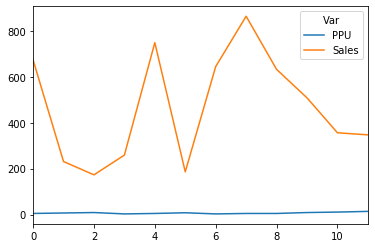

In [22]:
df3p.plot()